# Weather Data Analysis

### ASHRAE---Great-Energy-Predictor-III

#### By Edward Heronzy

This note book records some data analysis into the Weather Data that is part of the ASHRAE---Great-Energy-Predictor-III competion on Kaggle (https://www.kaggle.com/c/ashrae-energy-prediction/overview)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
ROOT = 'C:/Users/edher/Desktop/ML/datasets/ASHRAE_Great_Energy_Predictor_III'
filename1 = 'weather_train.csv'
filename2 = 'weather_test.csv'

In [3]:
weather_train = pd.read_csv(os.path.join(ROOT, filename1), delimiter=',')

In [4]:
weather_train.head(10)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
5,0,2016-01-01 05:00:00,19.4,NaN,19.4,0.0,NaN,0.0,0.0
6,0,2016-01-01 06:00:00,21.1,6.0,21.1,-1.0,1019.4,0.0,0.0
7,0,2016-01-01 07:00:00,21.1,NaN,21.1,0.0,1018.8,210.0,1.5
8,0,2016-01-01 08:00:00,20.6,NaN,20.0,0.0,1018.1,0.0,0.0
9,0,2016-01-01 09:00:00,21.1,NaN,20.6,0.0,1019.0,290.0,1.5


In [5]:
weather_train['air_temperature_F'] = weather_train['air_temperature'] * (9/5) + 32
weather_train['dew_temperature_F'] = weather_train['dew_temperature'] * (9/5) + 32
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,air_temperature_F,dew_temperature_F
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,77.00,68.00
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,75.92,69.98
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,73.04,69.98
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,69.98,69.08
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,68.00,68.00


In [6]:
weather_train['timestamp_dt'] = pd.to_datetime(weather_train['timestamp'])
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,air_temperature_F,dew_temperature_F,timestamp_dt
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,77.00,68.00,2016-01-01 00:00:00
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,75.92,69.98,2016-01-01 01:00:00
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,73.04,69.98,2016-01-01 02:00:00
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,69.98,69.08,2016-01-01 03:00:00
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,68.00,68.00,2016-01-01 04:00:00


In [7]:
weather_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 12 columns):
site_id               139773 non-null int64
timestamp             139773 non-null object
air_temperature       139718 non-null float64
cloud_coverage        70600 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     89484 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
wind_speed            139469 non-null float64
air_temperature_F     139718 non-null float64
dew_temperature_F     139660 non-null float64
timestamp_dt          139773 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 12.8+ MB


In [8]:
weather_train.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,air_temperature_F,dew_temperature_F
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000,139718.000000,139660.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527,57.952592,45.230285
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874,19.127871,17.622423
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000,-20.020000,-31.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000,44.960000,33.080000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000,59.000000,46.940000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000,71.960000,57.920000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000,116.960000,78.980000


In [9]:
weather_train.isnull().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
air_temperature_F        55
dew_temperature_F       113
timestamp_dt              0
dtype: int64

In [10]:
weather_train.groupby('site_id').count()

,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,air_temperature_F,dew_temperature_F,timestamp_dt
site_id,,,,,,,,,,,
0,8784,8781,4954,8781,8783,8699,8534,8784,8781,8781,8784
1,8763,8762,1701,8762,0,8711,8760,8763,8762,8762,8763
2,8783,8782,6429,8782,8717,8739,8192,8778,8782,8782,8783
3,8780,8776,5138,8774,8743,8622,8627,8776,8776,8774,8780
4,8783,8783,4553,8781,7466,8710,8678,8783,8783,8781,8783
5,8755,8753,2725,8753,0,0,8460,8752,8753,8753,8755
6,8782,8772,5790,8772,8782,8607,8003,8743,8772,8772,8782
7,8614,8614,0,8591,731,8606,8614,8614,8614,8591,8614
8,8784,8781,4954,8781,8783,8699,8534,8784,8781,8781,8784


##### Things to note

* *air_temperature*, *dew_temperature*, *wind_direction*, and *wind_speed* are the only features which all site ids have measurements for
* Site 1 has no *precip_depth_1_hr* measurements
* Site 5 has no *preip_depth_1_hr* and *sea_level_pressure* measurements
* Site 7 has no *cloud_coverage* measurements
* Site 11 has no *cloud_coverage* measurements
* Site 12 has no *precip_depth_1_hr* measurements

In [11]:
weather_train.groupby('site_id').mean()

,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,air_temperature_F,dew_temperature_F
site_id,,,,,,,,,
0,22.836021,3.044610,16.817880,1.382557,1017.988378,156.494024,3.375114,73.104838,62.272183
1,11.711801,0.084656,7.646473,NaN,1015.989795,195.584475,3.967043,53.081242,45.763652
2,24.940321,1.958469,4.069506,0.157738,1011.679311,152.777100,2.932764,76.892578,39.325110
3,15.520579,3.879136,8.126214,0.691868,1017.938692,185.063174,3.910893,59.937042,46.627185
4,15.236366,1.867999,9.894750,0.248594,1016.887750,207.864715,3.858226,59.425458,49.810550
5,10.867931,0.290642,8.194676,NaN,NaN,200.053191,4.768087,51.562276,46.750417
6,15.141678,0.647668,7.320691,0.797768,1017.527954,131.618143,2.197758,59.255021,45.177244
7,7.888867,NaN,1.905913,11.350205,1015.252010,208.931739,3.445565,46.199961,35.430644
8,22.836021,3.044610,16.817880,1.382557,1017.988378,156.494024,3.375114,73.104838,62.272183


##### Things to Note

* Site 7 and Site 11 have identical mean values for the displayed features, as well as both missing cloud coverage values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000248E8382F28>,
      dtype=object)

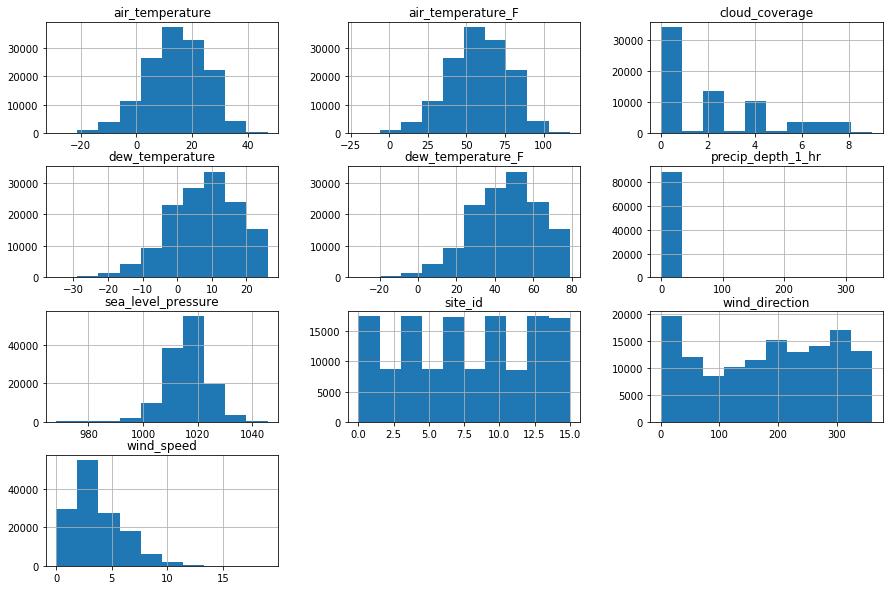

In [12]:
weather_train.hist(figsize=(15,10))

In [13]:
temp = pd.pivot_table(weather_train, values='air_temperature_F', index='timestamp_dt', columns='site_id')

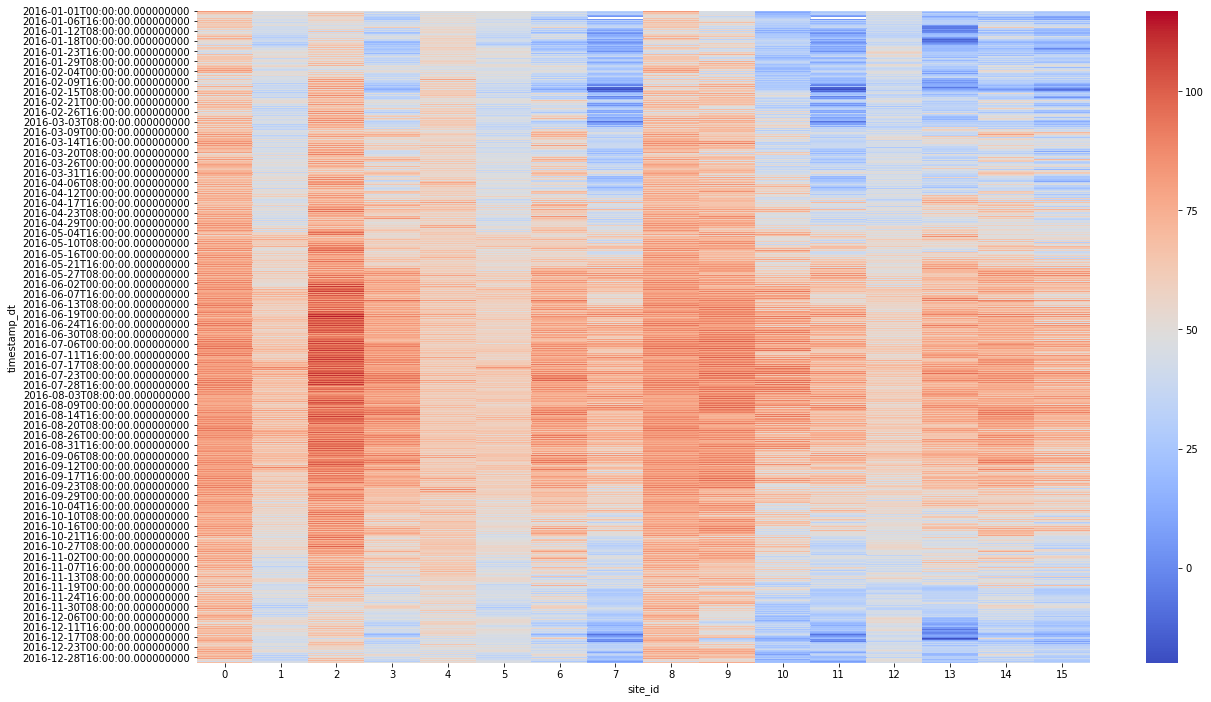

In [34]:
plt.subplots(figsize=(20,12))
sns.heatmap(temp, cmap='coolwarm')

https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html
##### Things to Note

* All of the sites appear to be in the Northern Hemisphere
* Note of the seemingly identical profiles for sites 7 and 11
* Note the similar profiles for sites 3 and 6